<a href="https://colab.research.google.com/github/AnDoan170/Federal-Reserves-API/blob/main/API_Midterm_project_Group_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FEDERAL RESERVES API PROJECT**
Presented by group 10:
* Đoàn Nguyễn Bảo An (K60CLC5) - 2114533002
* Nguyễn Chí Hiếu (K59CLC7) - 2015535167
* Lâm Hiếu Quyên (K60CLC5) - 2112533043

In the third year of university, we learned a fairly fundamental subject related to monetary theories, which is Monetary Finance. In that subject, the interest rate variable is mentioned a lot by our lecturer, and one of the capital markets that has an important influence on interest rates, thereby affecting the economy, is the Treasury bond market. From the FED's open data source, we scrape data on US Treasury bond yields with many different maturities to monitor the fluctuations of yield levels and apply what we have learned in Monetary Finance to analyzed observed results that we have visualized from colossal data from FED API.

In this project, we will strongly apply liquidity preference theory and some psychology knowledge to explain our observation from the data. This project will greatly relate to the US fluctuations of treasury bond yield and its economic health.


To get started, we have to run the code `!pip install fredapi` as Google Colab doesn't support this library rightaway.

In [ ]:
# Install fredapi into the notebook workspace
!pip install fredapi

## **Import necessary libraries**
Next, we will import some necessary libraries for initial reviews and analysis of this project.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fredapi import Fred

This project would require us to get the API key from Federal Reserves.

In [ ]:
fred_api = '9fd7aa17937d9c1a9685ff966614f8ae'

Now, import the `fred` class from `Fred` module for further search and analysis

In [ ]:
fred = Fred(api_key = fred_api)

## FINDING DATAS
Using FRED library, we start to search for neccessary data in FRED colossal data source. We are aiming to take treasury bond yield for different maturity period, so our key words are 'market yield treasury'

In [ ]:
Search_result = fred.search('market yield treasury', order_by = 'popularity')
Search_result.head(5)

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-09-19,2023-09-19,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-09-18,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-09-19 09:05:14-05:00,93,The ICE BofA Option-Adjusted Spreads (OASs) ar...
DGS10,DGS10,2023-09-19,2023-09-19,Market Yield on U.S. Treasury Securities at 10...,1962-01-02,2023-09-15,Daily,D,Percent,%,Not Seasonally Adjusted,NSA,2023-09-18 15:20:07-05:00,91,For further information regarding treasury con...
DFII10,DFII10,2023-09-19,2023-09-19,Market Yield on U.S. Treasury Securities at 10...,2003-01-02,2023-09-15,Daily,D,Percent,%,Not Seasonally Adjusted,NSA,2023-09-18 15:19:04-05:00,85,For further information regarding treasury con...
DGS2,DGS2,2023-09-19,2023-09-19,Market Yield on U.S. Treasury Securities at 2-...,1976-06-01,2023-09-15,Daily,D,Percent,%,Not Seasonally Adjusted,NSA,2023-09-18 15:21:07-05:00,80,For further information regarding treasury con...
DGS1,DGS1,2023-09-19,2023-09-19,Market Yield on U.S. Treasury Securities at 1-...,1962-01-02,2023-09-15,Daily,D,Percent,%,Not Seasonally Adjusted,NSA,2023-09-18 15:21:09-05:00,78,For further information regarding treasury con...


The topic we want to choose would relate to the market yield. Thus we would like to get data series of bond yield in the U.S. for maturity of 30 years, 10 years, 5 years, 2 years and 1 year, and then store it in the `bond_yield` DataFrame.

DGS1: 1-year Treasury Bond Yield

DGS2: 2-year Treasury Bond Yield

DGS5: 5-year Treasury Bond Yield

DGS10: 10-year Treasury Bond Yield

DGS30: 30-year Treasury Bond Yield

In [ ]:
dgs_id = ['DGS30', 'DGS10', 'DGS5', 'DGS2', 'DGS1']

# Initialize an empty DataFrame
bond_yield = pd.DataFrame()

for id in dgs_id:
    # Get the series
    series = fred.get_series(id)

    # Convert the series to a DataFrame and rename the column
    series_bond_yield = series.to_frame().rename(columns={0: id})

    # Merge the series DataFrame into the main DataFrame
    if bond_yield.empty:
        bond_yield = series_bond_yield
    else:
        bond_yield = bond_yield.merge(series_bond_yield, left_index=True, right_index=True, how='outer')

bond_yield.reset_index(inplace = True)
bond_yield.columns = ['Date', 'DGS30', 'DGS10', 'DGS5', 'DGS2', 'DGS1']
bond_yield.head()

,Date,DGS30,DGS10,DGS5,DGS2,DGS1
0,1962-01-02,NaN,4.06,3.88,NaN,3.22
1,1962-01-03,NaN,4.03,3.87,NaN,3.24
2,1962-01-04,NaN,3.99,3.86,NaN,3.24
3,1962-01-05,NaN,4.02,3.89,NaN,3.26
4,1962-01-08,NaN,4.03,3.91,NaN,3.31


## **CLEAN DATA**
We can see that there might be periods where some of the data are `null`. Let's look through the basic information of DataFrame `bond_yield` and check if `bond_yield` has `null` values or not.

In [ ]:
# Check basic information
print(bond_yield.info())

# Check the number of null values of each column
print(bond_yield.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16099 entries, 0 to 16098
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    16099 non-null  datetime64[ns]
 1   DGS30   11643 non-null  float64       
 2   DGS10   15413 non-null  float64       
 3   DGS5    15413 non-null  float64       
 4   DGS2    11821 non-null  float64       
 5   DGS1    15413 non-null  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 754.8 KB
None
Date        0
DGS30    4456
DGS10     686
DGS5      686
DGS2     4278
DGS1      686
dtype: int64


It's obvious that `bond_yield` DataFrame has `null` values in some columns. For the sake of convenience for later calculations, we wiil drop rows that exist `null` values.

In [ ]:
# Filter the values
bond_yield = bond_yield.dropna()
bond_yield.head()

,Date,DGS30,DGS10,DGS5,DGS2,DGS1
3945,1977-02-15,7.70,7.36,6.72,6.04,5.39
3946,1977-02-16,7.67,7.34,6.70,6.02,5.40
3947,1977-02-17,7.67,7.26,6.67,5.99,5.33
3948,1977-02-18,7.76,7.41,6.82,6.06,5.38
3950,1977-02-22,7.77,7.42,6.84,6.09,5.46


Now, let's plot some line for each features

<Figure size 800x600 with 0 Axes>

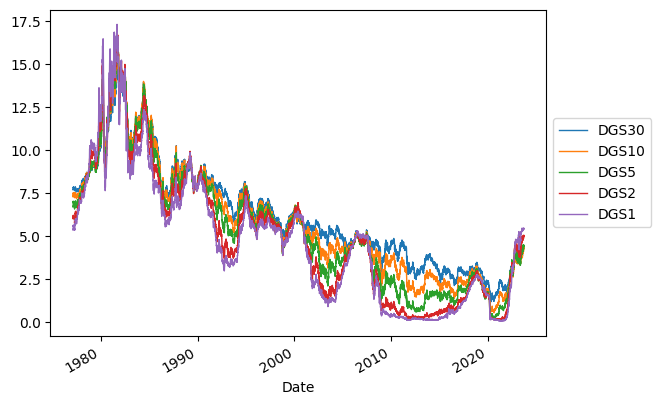

In [ ]:
# Set the size of the plot
plt.figure(figsize = (8, 6))

# Plot the market yield for 30 years, 10 years, 5 years, 2 years and 1 year into one figure
bond_yield.plot(x = 'Date', y = ['DGS30', 'DGS10', 'DGS5', 'DGS2', 'DGS1'], linewidth = 1)

# Put the legend outside the graph
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## **FINDING RECESSION PERIOD**
After successfully ploting five line of treasury bond yield for five different maturity period. We are heading to find whether there is available data on US's recession period.

In [ ]:
fred.search('Recession', filter = ('frequency', 'Daily')).head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
USRECD,USRECD,2023-09-19,2023-09-19,NBER based Recession Indicators for the United...,1854-12-01,2023-09-17,"Daily, 7-Day",D,+1 or 0,+1 or 0,Not Seasonally Adjusted,NSA,2023-09-18 18:02:03-05:00,54,This time series is an interpretation of US Bu...
USRECDM,USRECDM,2023-09-19,2023-09-19,NBER based Recession Indicators for the United...,1854-12-01,2023-09-17,"Daily, 7-Day",D,+1 or 0,+1 or 0,Not Seasonally Adjusted,NSA,2023-09-18 18:02:02-05:00,36,This time series is an interpretation of US Bu...
EURORECD,EURORECD,2023-09-19,2023-09-19,OECD based Recession Indicators for Euro Area ...,1960-03-01,2022-08-31,"Daily, 7-Day",D,+1 or 0,+1 or 0,Not Seasonally Adjusted,NSA,2022-12-09 14:50:02-06:00,19,This time series is an interpretation of Organ...
USRECDP,USRECDP,2023-09-19,2023-09-19,NBER based Recession Indicators for the United...,1854-12-01,2023-09-17,"Daily, 7-Day",D,+1 or 0,+1 or 0,Not Seasonally Adjusted,NSA,2023-09-18 18:02:02-05:00,30,This time series is an interpretation of US Bu...
USARECDM,USARECDM,2023-09-19,2023-09-19,OECD based Recession Indicators for the United...,1947-02-01,2022-09-30,"Daily, 7-Day",D,+1 or 0,+1 or 0,Not Seasonally Adjusted,NSA,2022-12-09 14:43:02-06:00,21,This time series is an interpretation of Organ...


Since we want to get the recession period of the United States, we will choose `series_id = 'USCERD'`. The reason of choosing this is due to our `bond_yield` DataFrame has daily series, so we would choose the recession series also by day. Moreover, since we have filtered the date from `1977-02-15`, thus we would also filter the recession data to start from `1977-02-15`.

In [ ]:
# Get the data series and reset index
recession = fred.get_series('USRECD').reset_index()

# Rename the columns
recession.columns = ['Date', 'isRecession']

# Filter the date from 1977-02-15
recession = recession.loc[recession['Date'] > '1977-02-15']

# Change 'isRecession' column from float to int.
recession['isRecession'] = recession['isRecession'].astype(int)

# Display the data
recession.head()

,Date,isRecession
44637,1977-02-16,0
44638,1977-02-17,0
44639,1977-02-18,0
44640,1977-02-19,0
44641,1977-02-20,0


Next, we will merge this `recession` DataFrame with the `bond_yield` DataFrame above and name is `bond_yield_with_res`

In [ ]:
bond_yield_with_res = bond_yield.merge(recession, on = 'Date')
bond_yield_with_res.head()

,Date,DGS30,DGS10,DGS5,DGS2,DGS1,isRecession
0,1977-02-16,7.67,7.34,6.70,6.02,5.40,0
1,1977-02-17,7.67,7.26,6.67,5.99,5.33,0
2,1977-02-18,7.76,7.41,6.82,6.06,5.38,0
3,1977-02-22,7.77,7.42,6.84,6.09,5.46,0
4,1977-02-23,7.81,7.48,6.95,6.12,5.50,0


Get the basic statistics relating to the `bond_yield_with_res` DataFrame.

In [ ]:
bond_yield_with_res.describe()

,DGS30,DGS10,DGS5,DGS2,DGS1,isRecession
count,11642.000000,11642.000000,11642.000000,11642.000000,11642.000000,11642.000000
mean,6.249292,5.867187,5.450448,4.985589,4.712900,0.103333
std,3.040527,3.333053,3.558380,3.783390,3.813293,0.304406
min,0.990000,0.520000,0.190000,0.090000,0.040000,0.000000
25%,3.750000,3.010000,2.370000,1.570000,1.270000,0.000000
50%,5.690000,5.310000,5.020000,4.720000,4.700000,0.000000
75%,8.200000,8.060000,7.810000,7.440000,6.940000,0.000000
max,15.210000,15.840000,16.270000,16.950000,17.310000,1.000000


## **PLOTTING BOND YIELD MARKED WITH RECESSION PERIOD**
Now, highlight the recession period for the previous graph.

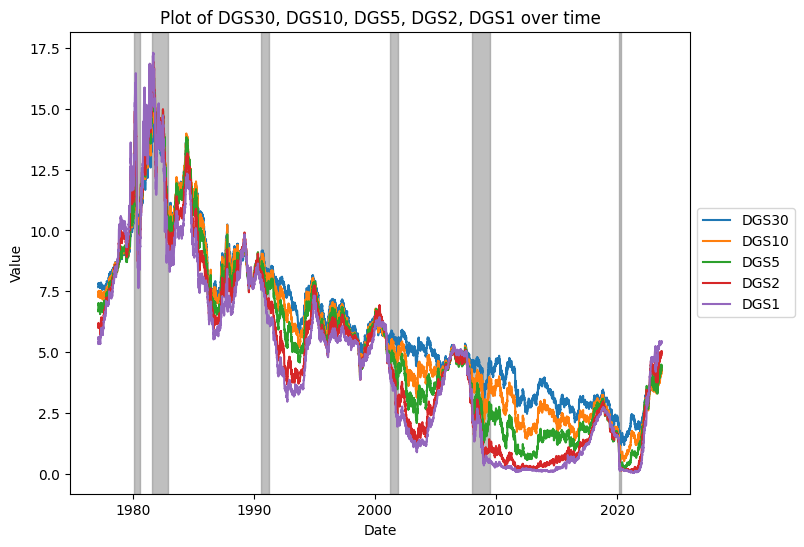

In [ ]:
plt.figure(figsize = (8, 6))

# Plot each column
for column in ['DGS30', 'DGS10', 'DGS5', 'DGS2', 'DGS1']:
    plt.plot(bond_yield_with_res['Date'], bond_yield_with_res[column], label=column)

# Highlight recession periods
recession_start = None
for i in range(len(bond_yield_with_res)):
    if bond_yield_with_res['isRecession'].iloc[i] == 1:
        if recession_start is None:
            recession_start = bond_yield_with_res['Date'].iloc[i]
    elif recession_start is not None:
        plt.axvspan(recession_start, bond_yield_with_res['Date'].iloc[i], color='gray', alpha=0.5)
        recession_start = None

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Plot of DGS30, DGS10, DGS5, DGS2, DGS1 over time')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## **NUMBERING RECESSION**
For further analysis, we would mark the recession periods with number. For example, the first recession would be marked as 'Recession number 1', and continue doing so. If not, mark 'No recession'

In [ ]:
recession_number = 0
is_in_recession = False

def label_recession(row):
    global recession_number, is_in_recession
    if row['isRecession'] == 1 and not is_in_recession:
        recession_number += 1
        is_in_recession = True
        return f'Recession number {recession_number}'
    elif row['isRecession'] == 1 and is_in_recession:
        return f'Recession number {recession_number}'
    else:
        is_in_recession = False
        return 'No recession'

bond_yield_with_res['Name of recession'] = bond_yield_with_res.apply(label_recession, axis=1)

bond_yield_with_res.head()

,Date,DGS30,DGS10,DGS5,DGS2,DGS1,isRecession,Name of recession
0,1977-02-16,7.67,7.34,6.70,6.02,5.40,0,No recession
1,1977-02-17,7.67,7.26,6.67,5.99,5.33,0,No recession
2,1977-02-18,7.76,7.41,6.82,6.06,5.38,0,No recession
3,1977-02-22,7.77,7.42,6.84,6.09,5.46,0,No recession
4,1977-02-23,7.81,7.48,6.95,6.12,5.50,0,No recession


Now, filter the recession period

In [ ]:
recession_period = bond_yield_with_res[bond_yield_with_res['Name of recession'].str.contains('Recession number')]
recession_period.head()

,Date,DGS30,DGS10,DGS5,DGS2,DGS1,isRecession,Name of recession
735,1980-02-01,11.23,11.29,11.30,12.04,12.62,1,Recession number 1
736,1980-02-04,11.32,11.40,11.38,12.12,12.67,1,Recession number 1
737,1980-02-05,11.64,11.73,11.80,12.49,12.91,1,Recession number 1
738,1980-02-06,11.78,11.92,11.86,12.42,12.84,1,Recession number 1
739,1980-02-07,11.70,11.71,11.61,12.21,12.68,1,Recession number 1


## **Testify liquidity preference theory and market interest rate critical threshold hypothesis.**
Based on research and personal experience combined with learned theories about Monetary Finance. We want to find the periods where the 1-year Treasury bond yield crosses above and exceeds longer-maturity Treasury bonds such as the 2-year and 5-year maturities. In theory, when short-term yields cross longer-term yield lines, it means market expectations are leaning towards future short-term interest rates falling, which in practice is good, but if we understand market psychology more deeply, you will know that at times when short-term yields cut up, it means that the current interest rate increase is too fast or the market has reached a critical threshold in interest rates. That means no one in the market can imagine interest rates could go higher.These are dangerous times for the economy when interest rates are almost at their critical level and the economy can hardly endure those interest rates any longer. To testify our understanding, we plot periods when DGS1(1-year treasury bond yield) exceeds both DGS2(2-year treasury bond yield) and DGS5(5-year treasury bond yield), Recession period and five terms of treasury bond yield.
Plot when DGS1 > DGS2 and DGS1 > DGS5

In [ ]:
highlight = bond_yield_with_res.copy()
highlight['DGS1 > [DGS2, DGS5]'] = ((highlight['DGS1'] > highlight['DGS2']) & (highlight['DGS1'] > highlight['DGS5']))
highlight = highlight.reset_index(drop = True)
highlight

,Date,DGS30,DGS10,DGS5,DGS2,DGS1,isRecession,Name of recession,"DGS1 > [DGS2, DGS5]"
0,1977-02-16,7.67,7.34,6.70,6.02,5.40,0,No recession,False
1,1977-02-17,7.67,7.26,6.67,5.99,5.33,0,No recession,False
2,1977-02-18,7.76,7.41,6.82,6.06,5.38,0,No recession,False
3,1977-02-22,7.77,7.42,6.84,6.09,5.46,0,No recession,False
4,1977-02-23,7.81,7.48,6.95,6.12,5.50,0,No recession,False
...,...,...,...,...,...,...,...,...,...
11637,2023-09-11,4.37,4.29,4.40,4.97,5.40,0,No recession,True
11638,2023-09-12,4.35,4.27,4.41,4.98,5.42,0,No recession,True
11639,2023-09-13,4.34,4.25,4.39,4.96,5.42,0,No recession,True
11640,2023-09-14,4.39,4.29,4.42,5.00,5.42,0,No recession,True


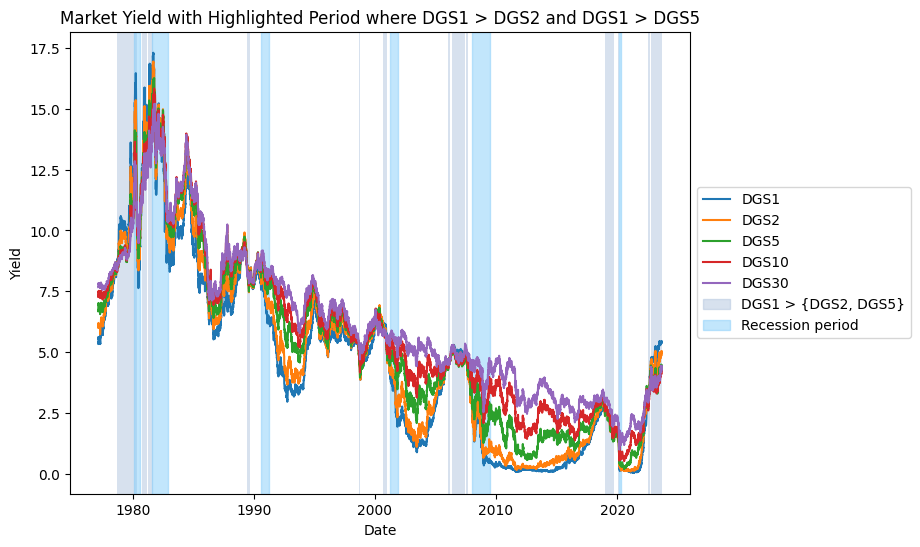

In [ ]:
import matplotlib.patches as mpatches

# Set the subplots and figure size
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)

# Set each line
line1, = ax.plot(highlight['Date'], highlight['DGS1'], label='DGS1')
line2, = ax.plot(highlight['Date'], highlight['DGS2'], label='DGS2')
line3, = ax.plot(highlight['Date'], highlight['DGS5'], label='DGS5')
line4, = ax.plot(highlight['Date'], highlight['DGS10'], label='DGS10')
line5, = ax.plot(highlight['Date'], highlight['DGS30'], label='DGS30')

# Highlight parts where 'DGS1 > [DGS2, DGS5]' are True
for i in range(1, len(highlight)):
    if highlight.loc[i, 'DGS1 > [DGS2, DGS5]']:
        ax.axvspan(highlight.loc[i-1, 'Date'], highlight.loc[i, 'Date'], facecolor='lightsteelblue', alpha=0.5)
patch_1 = mpatches.Patch(color='lightsteelblue', alpha=0.5, label='DGS1 > {DGS2, DGS5}')

recession_start = None
for i in range(len(highlight)):
    if highlight['isRecession'].iloc[i] == 1:
        if recession_start is None:
            recession_start = highlight['Date'].iloc[i]
    elif recession_start is not None:
        plt.axvspan(recession_start, highlight['Date'].iloc[i], color='lightskyblue', alpha=0.5)
        recession_start = None
patch_2 = mpatches.Patch(color='lightskyblue', alpha=0.5, label='Recession period')

plt.xlabel('Date')
plt.ylabel('Yield')
plt.title('Market Yield with Highlighted Period where DGS1 > DGS2 and DGS1 > DGS5')

# Adđ line & patch variables into the handles parameter.
plt.legend(handles=[line1, line2, line3, line4, line5, patch_1, patch_2], loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Through the plot above, we can easily see that bond yields of all terms tend to decrease after the period when the DGS1 line crosses longer terms such as DGS2(2-year treasury bond yield) or DGS5(5-year treasury bond yield). This is entirely consistent with the theory of liquidity preference which provides an indicator for future expectations of interest rate movements. Further, if we look at major recessions then You will see that there are often periods where long-term yields cut short-term yields before every recession. This is consistent with the hypothesis about the critical threshold of market interest rates.

## **Finding market interest rate expectation at every beginning of each recession period**
In our project, We want to observe market expectations of future interest rate movements at the beginning of recession periods based on liquidity preference theory. We will plot the yields for five different Treasury bond maturities on the same chart and will observe what the market expects of interest rates at the beginning of each recession.(* *based on the theory of liquidity preference.*)

In [ ]:
first_recession_date = recession_period.groupby('Name of recession').first().reset_index()

# Drop the 'Name of recession' column and save it to temp
temp = first_recession_date.pop('Name of recession')

# Add 'Name of recession' column back to the last column of the DataFrame
first_recession_date.insert(len(first_recession_date.columns), 'Name of recession', temp)

# Reset the index
first_recession_date = first_recession_date.reset_index(drop = True)

first_recession_date

,Date,DGS30,DGS10,DGS5,DGS2,DGS1,isRecession,Name of recession
0,1980-02-01,11.23,11.29,11.30,12.04,12.62,1,Recession number 1
1,1981-08-03,14.27,14.95,15.62,16.16,16.58,1,Recession number 2
2,1990-08-01,8.36,8.29,8.06,7.85,7.63,1,Recession number 3
3,2001-04-02,5.49,4.98,4.66,4.22,4.10,1,Recession number 4
4,2008-01-02,4.35,3.91,3.28,2.88,3.17,1,Recession number 5
5,2020-03-02,1.66,1.10,0.88,0.84,0.89,1,Recession number 6


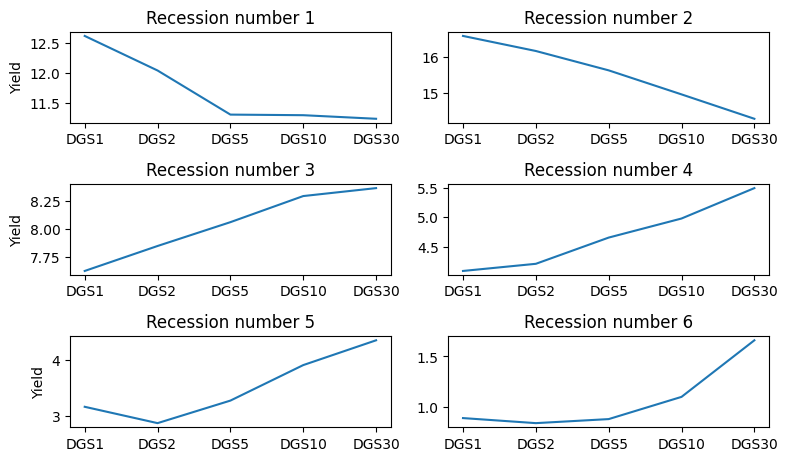

In [ ]:
# Plot each 2 graphs on one row
fig = plt.figure(figsize=(8, 6))
for index in range(0,len(first_recession_date),2):
    ax = fig.add_subplot(len(first_recession_date)//2+1 ,2,index+1)
    ax.plot(['DGS1', 'DGS2', 'DGS5', 'DGS10', 'DGS30'],
            [first_recession_date.loc[index,'DGS1'],
             first_recession_date.loc[index,'DGS2'],
             first_recession_date.loc[index,'DGS5'],
             first_recession_date.loc[index,'DGS10'],
             first_recession_date.loc[index,'DGS30']])
    ax.set_title(first_recession_date.loc[index,'Name of recession'])
    ax.set_ylabel('Yield')

    if index+1 < len(first_recession_date):
        ax = fig.add_subplot(len(first_recession_date)//2+1 ,2,index+2)
        ax.plot(['DGS1', 'DGS2', 'DGS5', 'DGS10', 'DGS30'],
                [first_recession_date.loc[index+1,'DGS1'],
                 first_recession_date.loc[index+1,'DGS2'],
                 first_recession_date.loc[index+1,'DGS5'],
                 first_recession_date.loc[index+1,'DGS10'],
                 first_recession_date.loc[index+1,'DGS30']])
        ax.set_title(first_recession_date.loc[index+1,'Name of recession'])
plt.tight_layout()
plt.show()

Only in recession No. 1(1980) and recession No. 2(1981) did the interterm yield curve show a decline, meaning the market expected a sharp reduction in interest rates in the future.

The following two recessions(1990 and 2001) showed a steepening of the inter-term yield curve, meaning the market expected an increase in interest rates in the future. This can be an evidence for US economy power and the recession is only an acute symtom. Or this can be a signal for a higher risk level for US long-term economy.

And in the last two recessions(2008 and 2020). DGS2(2-year treasury bond yield) is lower than DGS1(1-year treasury bond yield), showing that the market expects a short-term interest rate cut but interest rates are still expected to remain stable in the long term.

How about market expectation for future interest rate currently?

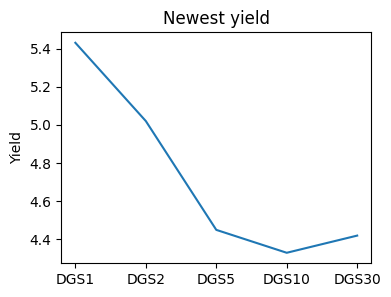

In [ ]:
# Get the latest market bond yield
newest_yield = bond_yield.iloc[-1]

# Drop the 'Date' series
labels = newest_yield.index
values = newest_yield.values
labels = np.delete(labels, 0)
labels = labels[::-1]
values = np.delete(values, 0)
values = values[::-1]

# Plot the graph
plt.figure(figsize = (4, 3))
plt.plot(labels, values, label = labels)
plt.ylabel('Yield')
plt.title('Newest yield')
plt.show()

we can see that there is a steep decline in yield for longer-maturity, which means that the market is expecting market interest rate would fall in the future(*based on liquidity preference theory *). And according to the market psychology, US economy has reached its critical threshold and any further increase in interest rate can do great harm the the world's biggest economy.

## **OBSERVE M2 MONEY STOCK AND TREASURY BOND YIELD FLUCTUATIONS.**
we also learned that FED can influence the social money supply through buying and selling securities on the open market. FED can increase the money supply by buying bonds and reduce the money supply through selling bonds. We will observe whether fluctuations in government bond yields have any impact on M2 money supply?
But first we need to look for available data about M2 money stock of the US.

In [ ]:
m2_monthly = fred.get_series(series_id = 'M2SL')
m2_monthly

1959-01-01      286.6
1959-02-01      287.7
1959-03-01      289.2
1959-04-01      290.1
1959-05-01      292.2
               ...   
2023-03-01    20876.1
2023-04-01    20712.1
2023-05-01    20841.7
2023-06-01    20890.0
2023-07-01    20902.7
Length: 775, dtype: float64

We will first clean the data as our analysis is dating from 1977. Then we transform the format of data from billion dollars to % growth rate Year over Year by divide each month obsolute money stock to that equivalent data of the previous year.

In [ ]:
# Filter the date with the format YYYY-01-01
m2_monthly_jan = m2_monthly[m2_monthly.index.month == 1]

# Calculate the growth rate
m2_growth_rate = ((m2_monthly_jan - m2_monthly_jan.shift(1)) * 100 / m2_monthly_jan.shift(1)).astype(float).round(3)

# Filter the date from 1977-01-01
m2_growth_rate = m2_growth_rate[m2_growth_rate.index >= '1977-01-01']

# View the results
m2_growth_rate.head()

1977-01-01    13.501
1978-01-01     9.827
1979-01-01     7.181
1980-01-01     8.100
1981-01-01     8.377
dtype: float64

Finally, we plot the % Growth rate of M2 stock and five maturities of treasury bond.

<Figure size 800x600 with 0 Axes>

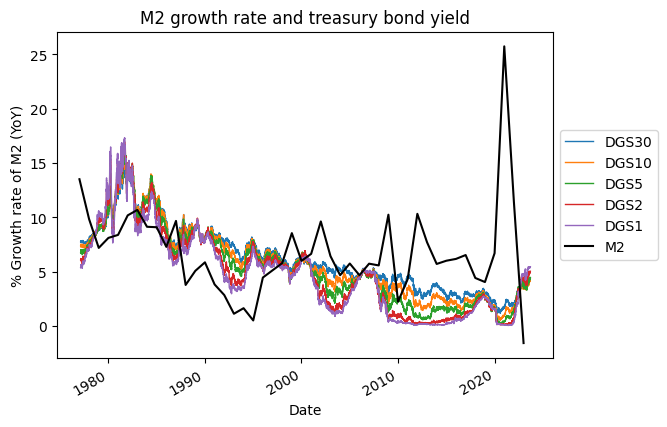

In [ ]:
# Set the size of the plot
plt.figure(figsize = (8, 6))

# Plot the market yield for 30 years, 10 years, 5 years, 2 years and 1 year into one figure
bond_yield.plot(x = 'Date', y = ['DGS30', 'DGS10', 'DGS5', 'DGS2', 'DGS1'], linewidth = 1)

# Plot the M2 growth rate
m2_growth_rate.plot(color = 'black', label = 'M2')

# Put the legend outside the graph
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('% Growth rate of M2 (YoY)')
plt.title('M2 growth rate and treasury bond yield')
plt.show()

We can observe that when interest rates are cut down on a large scale,  or when a large amount of bonds are purchased, the money supply increases at a fairly high rate in the following years. However, the two variables interest rate and money supply fluctuate with a lag or delay when interest rates usually fluctuate first. Through this observation, we can see that influencing the treasury bond market can adjust the money supply, thereby affecting the economy. From 2009 to 2014, the FED implemented quantitative easing, buying a large amount of treasury bonds, causing interest rates on the market to drop to low levels, thereby increasing the money supply at a very high speed to pull  US economy from the quagmire of the 2008 crisis. And in 2020, FED injected a lot of money to the economy causing interest rate decrease sharply.

This is the end of our project. Thank you for reading.